In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [5]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\data science assighnments\Clustering\Clustering\EastWestAirlines.csv',index_col = 0)

In [6]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [9]:
df.isnull().sum()


Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [10]:

# Compute Z-scores for the dataset
z_scores = np.abs(zscore(df)) 


In [11]:
# Set a threshold for Z-score
threshold = 3
data = df[(z_scores < threshold).all(axis=1)]


In [12]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [13]:
# Convert back to DataFrame 
data_scaled = pd.DataFrame(data, columns=df.columns)

In [14]:
data_scaled

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [15]:
pca = PCA(n_components=2)  # Reduce dimensions for visualization
reduced_data = pca.fit_transform(data_scaled)

In [16]:
# Convert PCA output to a DataFrame
pca_df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])

In [17]:
pca_df

,PCA1,PCA2
0,-34033.514621,-9332.956270
1,-42835.771195,-8023.723666
2,-20394.789857,-7308.045992
3,-47217.515306,-7104.687180
4,41011.983141,23424.750964
...,...,...
3625,-42458.058247,252.863554
3626,1905.019953,-13760.427430
3627,14509.428515,9140.661921
3628,-7551.292976,-12883.347662


In [46]:
features = data_scaled.iloc[:, 1:]  # Exclude customer ID 

In [40]:

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [41]:

# KMeans and Elbow Curve
inertia = []  

k_values = range(1, 11)


In [42]:

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)


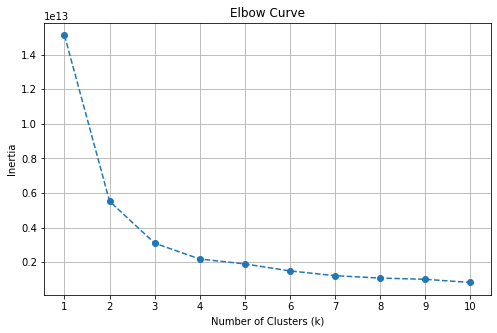

In [43]:
# Step 4: Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

In [52]:
# Step 5: Apply K-Means clustering with the optimal number of clusters (example: k=3)
optimal_k = 3  # Based on the elbow curve
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
data = data.copy()
data['Cluster'] = kmeans_final.fit_predict(scaled_features)

In [54]:
# Save or inspect the results
print(data.head())

     Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                      
1      28143           0          1          1          1          174   
2      19244           0          1          1          1          215   
3      41354           0          1          1          1         4123   
4      14776           0          1          1          1          500   
5      97752           0          4          1          1        43300   

     Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                       
1              1                  0                0               7000   
2              2                  0                0               6968   
3              4                  0                0               7034   
4              1                  0                0               6952   
5             26               

In [55]:

# Hierarchical Clustering using scikit-learn
n_clusters = 3  # Specify the number of clusters
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clustering.fit(data_scaled)




AgglomerativeClustering(n_clusters=3)

In [56]:
# Cluster Labels
print(f"Cluster labels: {clustering.labels_}")

Cluster labels: [0 0 0 ... 2 0 0]


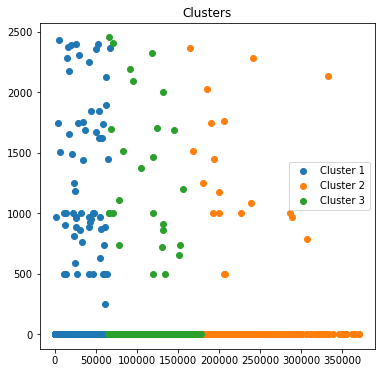

In [57]:
# Visualize Clusters
plt.figure(figsize=(6, 6))
for cluster in range(n_clusters):
    cluster_points = data_scaled[clustering.labels_ == cluster]
    cluster_points = np.array(cluster_points)  
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster+1}')
plt.title('Clusters')
plt.legend()
plt.show()

In [26]:
# Perform hierarchical clustering with different linkage criteria
linkage_criteria = ['single', 'complete', 'average', 'ward']

In [27]:
plt.figure(figsize=(10, 10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

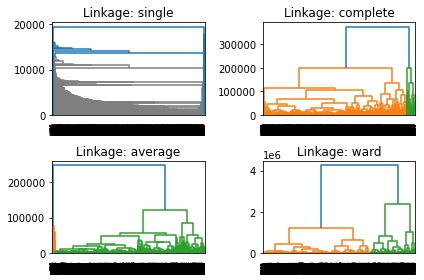

In [29]:
for i, method in enumerate(linkage_criteria, 1):
    # Compute the linkage matrix
    Z = linkage(data, method=method)
 # Plot dendrogram
    plt.subplot(2, 2, i)
    dendrogram(Z)
    plt.title(f"Linkage: {method}")

plt.tight_layout()
plt.show()

In [81]:
#  Apply DBSCAN
epsilon = 2  # Maximum distance between two points to be considered neighbors
min_samples = 3  # Minimum number of points to form a cluster


In [82]:
# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
data['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)

In [83]:
# The -1 in DBSCAN means noise points that don't belong to any cluster
print("Number of clusters found:", len(set(data['DBSCAN_Cluster'])) - (1 if -1 in data['DBSCAN_Cluster'].values else 0))
print("Cluster labels:", set(data['DBSCAN_Cluster']))


Number of clusters found: 9
Cluster labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, -1}


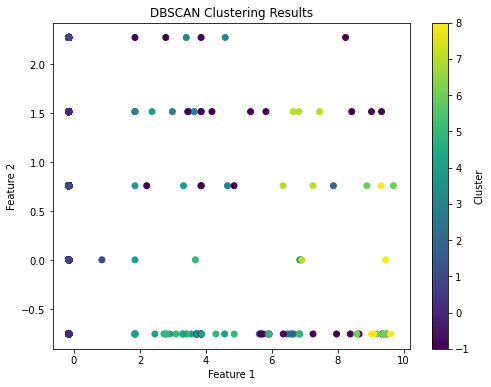

In [84]:
# Step 4: Plot the clusters (if data is 2D after PCA or other reduction)
plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=data['DBSCAN_Cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

In [85]:
#Check the number of noise points (where label == -1)
noise_points = data[data['DBSCAN_Cluster'] == -1]
print("Number of noise points:", len(noise_points))

Number of noise points: 44


In [86]:
# Compute the distances to the 4th nearest neighbor again
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(scaled_features)
distances, indices = neighbors_fit.kneighbors(scaled_features)

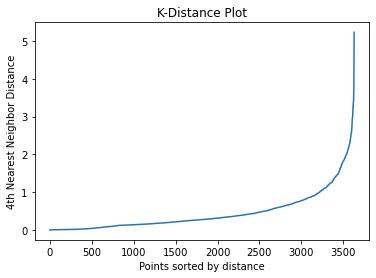

In [87]:
# Sort the distances in ascending order and plot
distances = np.sort(distances[:, 3], axis=0)
plt.plot(distances)
plt.title("K-Distance Plot")
plt.xlabel("Points sorted by distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.show()